# Environment Setting

In [1]:
import sys
sys.path.append('../scripts')

from HYDRO_Stats import TrendDetector

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Example data input

In [2]:
ds = xr.open_dataset('../data/lai_jjj_annual.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 37, lat: 76, lon: 77)
Coordinates:
  * time     (time) datetime64[ns] 1982-12-31 1983-12-31 ... 2018-12-31
  * lon      (lon) float64 112.2 112.3 112.4 112.6 ... 119.6 119.6 119.8 119.8
  * lat      (lat) float64 42.65 42.55 42.45 42.35 ... 35.45 35.35 35.25 35.15
Data variables:
    lai      (time, lat, lon) float64 ...

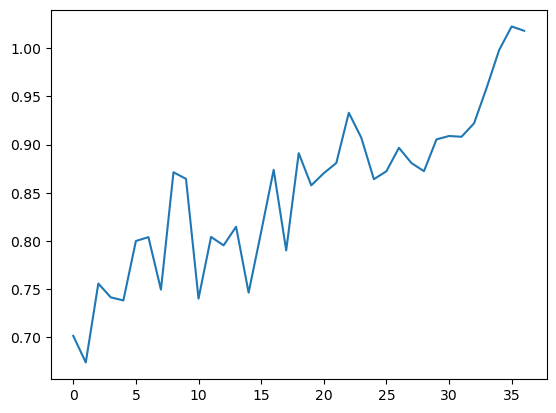

In [3]:
arr1D = np.nanmean(ds['lai'].values, axis=(1,2))
plt.plot(arr1D)

# Trend Detection for 1 Dimension Data

In [4]:
td = TrendDetector(method='linear')
resultDict = td.trend1D(arr1D)

In [5]:
resultDict

{'changeValue': 0.25856031470869967,
 'mean': 0.8497943908326983,
 'changeRatio': 30.426220447906356,
 'pValue': 1.9846611149053372e-13,
 'slope': 0.0069881166137486395,
 'intercept': 0.7240082917852227}

# Trend Detection for 3 Dimension Data

In [6]:
arr3D = ds['lai'].values

td3D = TrendDetector(method='sen')
resultDict = td3D.trend3D(arr3D)

  0%|          | 0/76 [00:00<?, ?it/s]

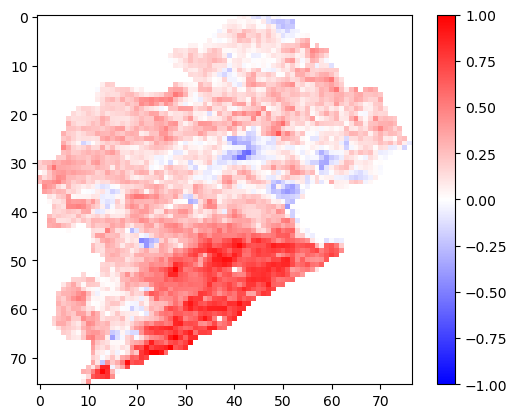

In [7]:
plt.imshow(resultDict['changeValue'], cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()